# Import Packages
    python has few commands of its very own.  You will need to import packages of functions.  NumPy is a fantastic package that includes all coding basics.  MatPlotLib (Math Ploting Library) is excellent for plotting.  AstroPy (astronomy) includes basic astronomy tools and units, like speed of light and cgs.  We will use its Guassian function.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Gaussian1D

# 1. Set Dependent Variable
     This is the velocity.  This could also be the wavelength or the frequency, if you like.  We will just call this x, but it can be called anything.  v or vel if you prefer; choose something that will make sense to you so that you will remember, but also short enough that you don't get tired of writing it over and over.   

     NumPy's linspace function is Linear Space - space out this range of points linearly, and with this many points.  Say, from -10 to 10, with 20 points:

In [2]:
x = np.linspace(-10,10,21)
print(x) # show the values

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


# 1. a) Arrays
    Your x variable is now called an array.  NumPy is very good at array manipulation, which we will show later.  Arrays are great ways to avoid 'hard coding' (manually coding a value) and for efficiency.  
    We want smooth Gaussians so we need a lot of points. 

In [3]:
x = np.linspace(-10,10,1000)

# 2. Create the Gaussians
    Each of our Gaussian distributions are defined by their amplitude (A), the x value they peak is at or center (cnt), and their width (w). To demonstrate array manipulation, these parameter values can be saved as arrays for each Gaussian.

    For the blue-wing:

In [4]:
A, cnt, w = 0.25, -3, 2
bw_para = [ A , cnt , w ]

#
    blue-core:

In [5]:
A, cnt, w = 0.75, -1, 1.5
bc_para = [ A , cnt , w ]

#
    red-core:

In [6]:
A, cnt, w = 0.75, 1, 1.5
rc_para = [ A , cnt , w ]

#
    red-wing:

In [7]:
A, cnt, w = 0.25, 3, 2
rw_para = [ A , cnt , w ]

# 2. a) Best Practices for Variable Names
    For this demonstration, I re-used A, cnt, and w.  DON'T make a habit of this, though.  You always use new variable names or you risk over-writing something.  Since the parameters are getting saved to a parameter array, I don't care about them getting over-written.  But reall, this shouldn't be done ever.  

# 2. b) Array Slicing
    Now we can use AstroPy's Gaussian1D function to create the Gaussian distribution.  The function requires you provide, amplitude, mean (center), and stddev (standard deviation or in lazy terms, the width).  These are the parameters we saved in the arrays.  Each value in an array is called an index.  Python starts counting at 0, so the first index in an array is index 0.  
    To get the value of an array at an index: 

In [8]:
print(x[0], x[106], x[912])

-10.0 -7.877877877877878 8.258258258258259


# 
    In this way, we pass the parameter values from the array to each of the Gauassian functions.  In practice, the parameters could be read from an input file or from a fitting procedure that does some calculation.  They won't be directly put into these Gaussian function by a user (that is hard coding).   

In [9]:
bw = Gaussian1D(amplitude=bw_para[0], mean=bw_para[1], stddev=bw_para[2])     # Blue wing
bc = Gaussian1D(amplitude=bc_para[0], mean=bc_para[1], stddev=bc_para[2])     # Blue core
rc = Gaussian1D(amplitude=rc_para[0], mean=rc_para[1], stddev=rc_para[2])     # Red core
rw = Gaussian1D(amplitude=rw_para[0], mean=rw_para[1], stddev=rw_para[2])     # Red wing

# 3. Ploting
    The most simple plot just needs your dependent and independent variables, x and f(x).  In our case, f(x) is the Gaussian function we just made.  Using the blue-wing as an example,

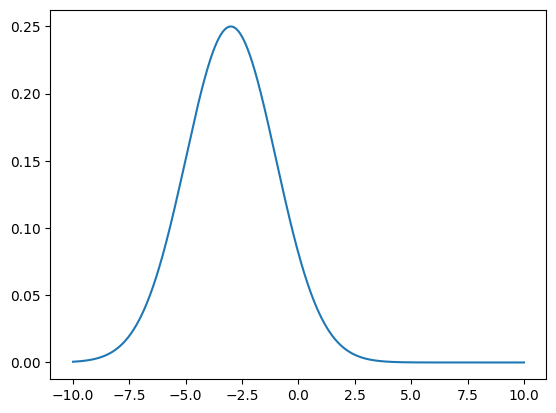

In [10]:
plt.plot(x,bw(x))

#
    We specify the color with 'color' or there are some colors that have short hands.  These are, black, white, blue, green, yellow, and red.  All of our Gaussians will be plotted on the same plot until plt.show().

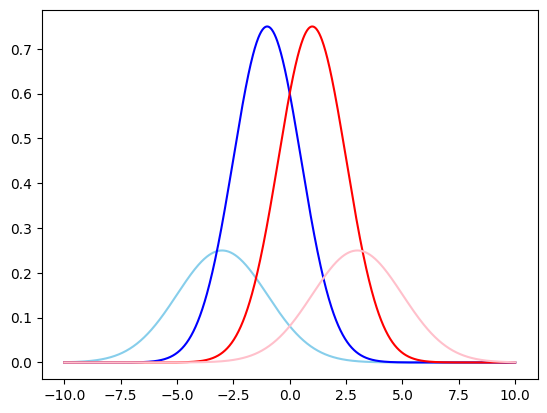

In [11]:
plt.plot(x,bw(x),color='skyblue')
plt.plot(x,bc(x),'b')
plt.plot(x,rc(x),'r')
plt.plot(x,rw(x),color='pink')
plt.show()

# 3. a) Adding Functions
    Adding functions is just like adding numbers.  Then we add the sum of all the Gaussians to create our actual, observed emission line profile.

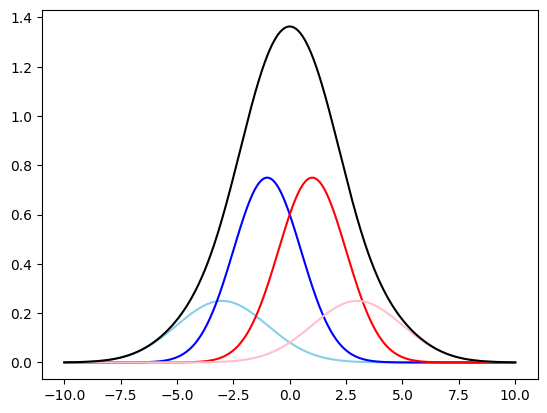

In [12]:
total = bw + bc + rc + rw

plt.plot(x,bw(x),color='skyblue')
plt.plot(x,bc(x),'b')
plt.plot(x,rc(x),'r')
plt.plot(x,rw(x),color='pink')
plt.plot(x,total(x),'k')
plt.show()

# 3. b) Professional Figures
    Professional looking figures (the plot is shown in the figure) are important to help others understand what you are showing.  Furthermore, done well, and they will also impress people. 
    some plotting tips and tricks
    1. choose colors that help convey information.  The red and blue wings and cores match in how I drew their colors.  At the same time, it is also nice to make your colors colorblind friendly.
    2. Make the fonts large enough for people to see!  Young people tend to make them too small, even those with glasses.
    3. Set an appropriate aspect ratio, usually this is a square.  The dimensions of the plot can change how it is precieved.  To do this, is helps to put the legend inside the figure (if you can, but don't force it if the legend covers stuff).
    4. Save your figure as a pdf, as this will give high resolution.  Dots per inch (dpi) should be set to 300 or higher.  300 is the minimum resolution required by the Astrophysical Journal.  Sometimes I use dpi=500, but this can make by large files that might be unnecessarily large files (like MB). 

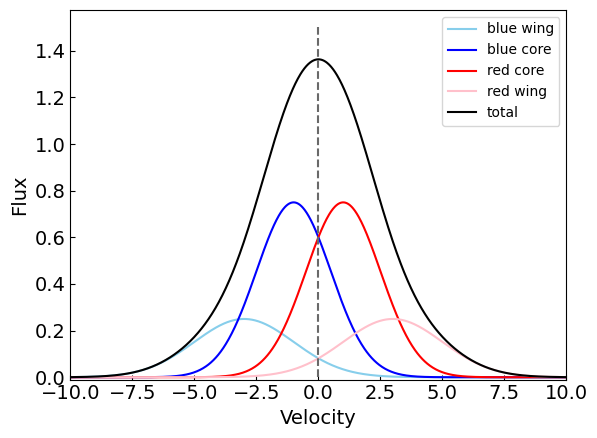

In [13]:
plt.plot(x,bw(x),color='skyblue',label='blue wing') # label is the label for the legend
plt.plot(x,bc(x),'b',label='blue core')
plt.plot(x,rc(x),'r',label='red core')
plt.plot(x,rw(x),color='pink',label='red wing')
plt.plot(x,total(x),'k',label='total')

# plot a vertical line at x=0 with a range from 0 to 1.5
plt.vlines(0,0,1.5,color='dimgray',linestyle='dashed')

plt.xlim([-10,10]) # x-axis range
plt.ylim([-0.01,None]) # y-axis range, None sets no limit

plt.xlabel('Velocity',fontsize=14) # x-axis title or label
plt.ylabel('Flux',fontsize=14) # y-axis title or label

plt.tick_params(labelsize=14,direction='in') # tick parameters of your x and y axii

plt.legend() # include the legend

# save the figure
plt.savefig('MyFigure.pdf', dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

# 4. File Saving
Next we will save a text file of the profile and each of its components.  


# 4. Saving a text/data/ascii and comma separated value (csv) file.  

Very technically, a text file has 'strings' (text) data and a data file has binary/number data.  The only difference is the extension, '.txt' and '.dat', respectively.  This is really only for the user's benefit, to quickly know what the file contains.  To a computer, it might use this to decide which application to use to open it with, but otherwise it is more or less the same.  There is no difference in content structure, that is. Therefore, you can just the extension compataible with your OS or for a particular file reader.  I'll use the term 'text file' to encompass text, data, and ascii files.    

A csv file organizes the contents in columns, which are separated with ',' and is readable by Excel (so is a text file).  Things used to separate columns in a text and csv file, like the comma, are called a 'delimeter'.  Delimeters and there code syntax are: 
comma      ','
semicolon  ';'
space      ' '      (can be more than 1 space)
tab        '\t'
new line   '\n'    (bascially the next row)

We want to save the total line profile and all 4 Gaussian components.  Each are a function of the same velocity, therefore, we can arrange them as a matrix.  Column 1 will be the velocity, then column 2 will be the total, and columns 3, 4, 5, and 6 will be each of the Gaussian components.

In [45]:
# combine all the arrays to create a matrix.  This is "array-like", 
# hence we can use the array function even though it is a matrix.
data = np.array([x,total(x),bw(x),bc(x),rc(x),rw(x)])
# np.array combines everything row by row; row 1 is the velocity, row 2 is total, etc.
# to flip the rows and columns, we must transpose the matrix.
data = data.T
# the above 2 steps could also have been combined into 1 line:
data = np.array([x,total(x),bw(x),bc(x),rc(x),rw(x)]).T

# 
Reading a matrix is similar to reading an array, as we did in Section 2.b).  To get a particular row and column the syntax is <arrayname>[row,column], where row and column are integers.  For example, if we want the first row of data: data[0,:], where ':' means 'all' - this returns the first row and all columns in that row.  If you want a particular value, row and column are the value coordinates: 

In [48]:
print(data[10,5]) # return the value at row=10 and column=5

3.1905624071889195e-10


In [49]:
print(data[:,0]) # return the first column, our velocities

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992
  -9.8998999   -9.87987988  -9.85985986  -9.83983984  -9.81981982
  -9.7997998   -9.77977978  -9.75975976  -9.73973974  -9.71971972
  -9.6996997   -9.67967968  -9.65965966  -9.63963964  -9.61961962
  -9.5995996   -9.57957958  -9.55955956  -9.53953954  -9.51951952
  -9.4994995   -9.47947948  -9.45945946  -9.43943944  -9.41941942
  -9.3993994   -9.37937938  -9.35935936  -9.33933934  -9.31931932
  -9.2992993   -9.27927928  -9.25925926  -9.23923924  -9.21921922
  -9.1991992   -9.17917918  -9.15915916  -9.13913914  -9.11911912
  -9.0990991   -9.07907908  -9.05905906  -9.03903904  -9.01901902
  -8.998999    -8.97897898  -8.95895896  -8.93893894  -8.91891892
  -8.8988989   -8.87887888  -8.85885886  -8.83883884  -8.81881882
  -8.7987988   -8.77877878  -8.75875876  -8.73873874  -8.71871872
  -8.6986987   -8.67867868  -8.65865866  -8.63863864  -8.61861862
  -8.5985986   -8.57857858  -8.55855856  -8.53853854  -8.51851852
  -8.49849

#
We can check everything was combined correctly by plotting the Gaussians again from the data matrix.

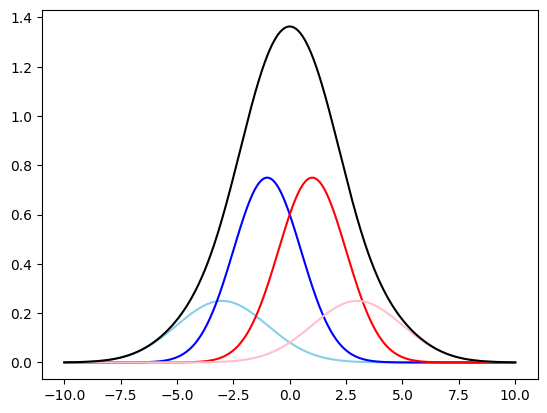

In [50]:
plt.plot(data[:,0],data[:,2],color='skyblue') 
plt.plot(data[:,0],data[:,3],'b')
plt.plot(data[:,0],data[:,4],'r')
plt.plot(data[:,0],data[:,5],color='pink')
plt.plot(data[:,0],data[:,1],'k')
plt.show()

#
Now that our Gaussians are orgnized in a matrix, it is the correct format for saving.  It is also very useful to add a header (column titles) so you know which column is what.  Let's make an list (an array of strings and numbers) with the column lables.  Strings (text) always are enclosed by " " or ' '.  The spaces in the string won't affect the delimeter.  I use tabs to help the titles line up with the data better.

In [51]:
# create a list of column titles.
hdr = ['Velocity (km/s)','total','blue wing','blue core','red core','red wing']
# join the list into a single string, separated by tabs
header = '\t'.join(hdr)
# the above 2 steps can be done in a single line of code:
header = '\t'.join(['Velocity (km/s)','total','blue wing','blue core','red core','red wing'])
# Python 3 update quirk - you cannot simply do:
#    'Velocity (km/s)\ttotal\tblue wing\tblue core\tred core\tred wing'
# you could in Python 2

In [52]:
# save the data to a text file
np.savetxt('MyLineProfile.txt',data)
# optionally, you can include a specific delimieter, the default is a space.
np.savetxt('MyLineProfile.txt',data,header=header,delimiter='\t')

# Saving a csv is just a matter of changing the extension and likewise for '.dat' file.
np.savetxt('MyLineProfile.csv',data)